In [2]:
Alpha_Name = "AlphaNet_Original_Input_10d_return"
start_time = "2021-01-01"
forecast_months = 6 # months
feat_num = 9

In [3]:
from os import walk
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import torch.utils.data as Data
import torch.optim as optim
from tqdm import tqdm
from torch.autograd import Variable
import time
import multiprocessing as mp
from os import walk
import matplotlib.pyplot as plt
path = '/home/wuwenjun/Data/' + Alpha_Name +'/'
output_path = "/home/wuwenjun/Alpha_Factor/" + Alpha_Name + "/result/"
model_dir = "/home/wuwenjun/Alpha_Factor/" + Alpha_Name + "/model/"
if os.path.exists(output_path) == False:
    os.makedirs(output_path)

In [80]:
array = np.random.uniform(10,20,(2,3,4))
array.shape

(2, 3, 4)

In [81]:
array[0]

array([[15.76722788, 11.46672506, 18.6389362 , 17.00546874],
       [11.44914406, 18.07043936, 11.92892513, 14.06267257],
       [13.66369242, 10.76202511, 15.73571666, 13.38928924]])

In [85]:
nn.BatchNorm1d(3)(torch.from_numpy(array).float())[0]

tensor([[-0.5425, -2.3333,  0.6534, -0.0268],
        [-1.4323,  1.3531, -1.2305, -0.3329],
        [ 0.2128, -1.0332,  1.1025,  0.0950]], grad_fn=<SelectBackward0>)

In [65]:
class AlphaNet_LSTM(nn.Module):
    def __init__(self, factor_num, fully_connect_layer_neural):
        super(AlphaNet_LSTM, self).__init__()
        self.fc1_neuron = factor_num # 108
        self.fc2_neuron = fully_connect_layer_neural # 30
        
        # Layer
        self.batch = torch.nn.BatchNorm1d(self.fc1_neuron)
        self.lstm = nn.LSTM(self.fc1_neuron,self.fc2_neuron,2,batch_first = True,bidirectional = True)
        self.batch2 = torch.nn.BatchNorm1d(self.fc2_neuron)
        self.dropout = nn.Dropout(0.3)
#         self.relu = nn.ReLU()
        self.out = nn.Linear(self.fc2_neuron, 1)

    def forward(self, x):
        x = self.batch(x)
        x = torch.transpose(x,1,2)
        _,(hn, cn) = self.lstm(x) # hn.shape: torch.Size([4, 512, 30])
        hn = hn[-1,:,:] # torch.Size([512, 30])
        hn = self.batch2(hn) # torch.Size([512, 30])
#         hn = self.relu(hn)
        hn = self.dropout(hn)
        y_pred = self.out(hn)
        return y_pred
# device=torch.device('cuda:0')

In [94]:
input = torch.randn(512, 108,3)
input = nn.BatchNorm1d(108)(input) # torch.Size([512, 108, 3])
input = torch.transpose(input,1,2) # torch.Size([512, 3, 108])
lstm = nn.LSTM(108,30,2,batch_first = True,bidirectional = True)
_,(hn, cn) = lstm(input) # hn.shape: torch.Size([4, 512, 30])
hn = hn[-1,:,:] # torch.Size([512, 30])
hn = nn.BatchNorm1d(hn.shape[1])(hn) # torch.Size([512, 30])
hn = nn.Linear(30, 1)(hn)
hn.shape

torch.Size([512, 1])

In [57]:
hn[0]

tensor([ 0.0924,  0.2280,  0.0244,  0.0845,  0.0319, -0.1176, -0.0449,  0.0104,
        -0.0573, -0.0293,  0.0148, -0.0893, -0.0829,  0.2017, -0.0115,  0.0792,
        -0.0190,  0.0715,  0.0356,  0.0613,  0.0250, -0.0698,  0.0317,  0.0305,
         0.0862, -0.1333, -0.0846,  0.1130,  0.0759, -0.0115],
       grad_fn=<SelectBackward0>)

tensor([-0.2453,  1.7833,  1.0407,  0.0656, -0.1649, -0.6911,  0.9391,  0.9299,
        -0.3160, -1.0063,  1.5618,  0.0593, -2.1502, -2.1140, -0.3285, -1.9638,
        -2.2645, -0.1361, -2.0910, -0.9766,  1.4421, -0.5457, -0.4764, -0.5834,
        -0.7231, -0.1158,  1.7581, -0.2203,  1.4370, -0.1667],
       grad_fn=<SelectBackward0>)

In [45]:
linear = nn.Linear(30, 1)(hn[-1,:,:])
linear.shape

torch.Size([512, 1])

In [46]:
linear

tensor([[0.2297],
        [0.1529],
        [0.1996],
        [0.1902],
        [0.1502],
        [0.1596],
        [0.1234],
        [0.1581],
        [0.1781],
        [0.1456],
        [0.2029],
        [0.0994],
        [0.1835],
        [0.0882],
        [0.2138],
        [0.1606],
        [0.1526],
        [0.1504],
        [0.1936],
        [0.1527],
        [0.2163],
        [0.1507],
        [0.1525],
        [0.2214],
        [0.1485],
        [0.1985],
        [0.1914],
        [0.1706],
        [0.1012],
        [0.1908],
        [0.2579],
        [0.2165],
        [0.1957],
        [0.1977],
        [0.1213],
        [0.1957],
        [0.1242],
        [0.1719],
        [0.1949],
        [0.1456],
        [0.1880],
        [0.1844],
        [0.0722],
        [0.1415],
        [0.2215],
        [0.1193],
        [0.2414],
        [0.2061],
        [0.1657],
        [0.1166],
        [0.2007],
        [0.2151],
        [0.2024],
        [0.1852],
        [0.2499],
        [0

In [26]:
pd.read_parquet("/home/wuwenjun/Data/AlphaNet_Original_Input_10d_return/Cov/2015-01-01_2015-03-01.par")

,timestamp,ticker,0,1,2,3,4,5,6,7,...,98,99,100,101,102,103,104,105,106,107
0,2015-02-16 09:30:00,1,1047.509016,165.116922,249.851660,924.464829,243.390500,183.194222,926.891342,158.088300,...,288364.803048,0.116978,-0.507560,0.002424,0.231962,-1.006395,0.004792,0.802678,0.314303,0.293151
1,2015-02-17 09:30:00,1,1284.106922,304.746632,233.319300,1251.132811,325.347890,190.544389,1311.161194,268.878420,...,296112.579137,-0.631529,0.450847,-0.004060,-1.252180,0.893914,-0.008043,0.530133,0.211982,0.301026
2,2015-02-25 09:30:00,1,1515.538580,320.840611,242.242430,1522.025569,325.437271,214.401980,1539.154187,259.118036,...,306633.514975,-0.636832,0.358378,-0.009671,-1.262708,0.710583,-0.019186,0.460200,0.223487,0.311721
3,2015-02-26 09:30:00,1,1466.712161,355.378729,244.332118,1546.573639,318.650776,222.730596,1381.349806,297.507667,...,325564.169376,-0.411530,0.013516,0.024216,-0.815931,0.026769,0.048028,0.486552,0.103638,0.330964
4,2015-02-27 09:30:00,1,1271.480107,335.406489,121.012389,1338.104279,252.973056,186.957378,1296.812044,215.993378,...,67163.079391,-0.456189,0.110313,0.011562,-0.904501,0.218697,0.022932,0.504122,0.243524,0.068276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12930,2015-02-16 09:30:00,603998,0.828789,0.422953,0.478456,0.432567,0.670000,0.448060,0.657067,0.370296,...,9579.908599,2.013009,7.865893,0.301897,2.013009,7.865893,0.301897,20.001105,21.877881,3.514249
12931,2015-02-17 09:30:00,603998,0.717016,0.501300,0.517742,0.360442,0.646556,0.496018,0.544506,0.254278,...,9935.583269,4.240812,6.622608,0.288704,4.240812,6.622608,0.288704,25.050546,22.937254,3.644728
12932,2015-02-25 09:30:00,603998,0.646518,0.589723,0.620109,0.368793,0.598149,0.603898,0.528344,0.360551,...,6356.012464,5.276553,0.524927,-0.597504,5.276553,0.524927,-0.597504,23.921703,15.732534,2.331627
12933,2015-02-26 09:30:00,603998,0.889291,0.591833,0.683202,0.863838,0.577800,0.693460,0.901598,0.343806,...,5369.029962,6.577296,1.069927,-0.500893,6.577296,1.069927,-0.500893,27.742989,9.223225,1.969571


In [27]:
pd.read_parquet("/home/wuwenjun/Data/AlphaNet_Original_Input_5d_return/Cov/2015-01-01_2015-03-01.par")

,timestamp,ticker,0,1,2,3,4,5,6,7,...,98,99,100,101,102,103,104,105,106,107
0,2015-02-16 09:30:00,1,1047.509016,165.116922,249.851660,924.464829,243.390500,183.194222,926.891342,158.088300,...,288364.803048,0.116978,-0.507560,0.002424,0.231962,-1.006395,0.004792,0.802678,0.314303,0.293151
1,2015-02-17 09:30:00,1,1284.106922,304.746632,233.319300,1251.132811,325.347890,190.544389,1311.161194,268.878420,...,296112.579137,-0.631529,0.450847,-0.004060,-1.252180,0.893914,-0.008043,0.530133,0.211982,0.301026
2,2015-02-25 09:30:00,1,1515.538580,320.840611,242.242430,1522.025569,325.437271,214.401980,1539.154187,259.118036,...,306633.514975,-0.636832,0.358378,-0.009671,-1.262708,0.710583,-0.019186,0.460200,0.223487,0.311721
3,2015-02-26 09:30:00,1,1466.712161,355.378729,244.332118,1546.573639,318.650776,222.730596,1381.349806,297.507667,...,325564.169376,-0.411530,0.013516,0.024216,-0.815931,0.026769,0.048028,0.486552,0.103638,0.330964
4,2015-02-27 09:30:00,1,1271.480107,335.406489,121.012389,1338.104279,252.973056,186.957378,1296.812044,215.993378,...,67163.079391,-0.456189,0.110313,0.011562,-0.904501,0.218697,0.022932,0.504122,0.243524,0.068276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12930,2015-02-16 09:30:00,603998,0.828789,0.422953,0.478456,0.432567,0.670000,0.448060,0.657067,0.370296,...,9579.908599,2.013009,7.865893,0.301897,2.013009,7.865893,0.301897,20.001105,21.877881,3.514249
12931,2015-02-17 09:30:00,603998,0.717016,0.501300,0.517742,0.360442,0.646556,0.496018,0.544506,0.254278,...,9935.583269,4.240812,6.622608,0.288704,4.240812,6.622608,0.288704,25.050546,22.937254,3.644728
12932,2015-02-25 09:30:00,603998,0.646518,0.589723,0.620109,0.368793,0.598149,0.603898,0.528344,0.360551,...,6356.012464,5.276553,0.524927,-0.597504,5.276553,0.524927,-0.597504,23.921703,15.732534,2.331627
12933,2015-02-26 09:30:00,603998,0.889291,0.591833,0.683202,0.863838,0.577800,0.693460,0.901598,0.343806,...,5369.029962,6.577296,1.069927,-0.500893,6.577296,1.069927,-0.500893,27.742989,9.223225,1.969571


In [3]:
time_list = []
data_path = path + "Final/"
dataframe_list = pd.DataFrame()
for f, _, i in walk(data_path):
    for j in tqdm(i):
        time_list.append(j)
time_list.sort()     
for count,item in enumerate(time_list):
    if item.startswith(start_time):
        train_timestamp = time_list[:count]
        test_timestamp = time_list[count:count + forecast_months//3]
        break
display(train_timestamp)
display(test_timestamp)

model_path = (model_dir + test_timestamp[0].split("_")[0] + "_" + test_timestamp[-1].split("_")[-1]).replace(".par","/")
if os.path.exists(model_path) == False:
    os.makedirs(model_path)

100%|██████████| 26/26 [00:00<00:00, 163741.60it/s]


['2015-01-01_2015-03-01.par',
 '2015-03-01_2015-06-01.par',
 '2015-06-01_2015-09-01.par',
 '2015-09-01_2016-01-01.par',
 '2016-01-01_2016-03-01.par',
 '2016-03-01_2016-06-01.par',
 '2016-06-01_2016-09-01.par',
 '2016-09-01_2017-01-01.par',
 '2017-01-01_2017-03-01.par',
 '2017-03-01_2017-06-01.par',
 '2017-06-01_2017-09-01.par',
 '2017-09-01_2018-01-01.par',
 '2018-01-01_2018-03-01.par',
 '2018-03-01_2018-06-01.par',
 '2018-06-01_2018-09-01.par',
 '2018-09-01_2019-01-01.par',
 '2019-01-01_2019-03-01.par',
 '2019-03-01_2019-06-01.par',
 '2019-06-01_2019-09-01.par',
 '2019-09-01_2020-01-01.par',
 '2020-01-01_2020-03-01.par',
 '2020-03-01_2020-06-01.par',
 '2020-06-01_2020-09-01.par',
 '2020-09-01_2021-01-01.par']

['2021-01-01_2021-03-01.par', '2021-03-01_2021-06-01.par']

In [4]:
trainx , trainy , testx , testy = [] , [] , [],  []

for train in tqdm(train_timestamp):
    df = pd.read_parquet(path+ "Final/" + train).set_index(["timestamp","ticker"])
    trainx.append(df.drop("target",axis=1))
    trainy.append(df['target'])
trainx = pd.concat(trainx,axis=0)
trainy = pd.concat(trainy,axis=0)

display(trainx)
display(trainy)


for test in tqdm(test_timestamp):
    df = pd.read_parquet(path+ "Final/" + test).set_index(["timestamp","ticker"])
    testx.append(df.drop("target",axis=1))
    testy.append(df['target'])
testx = pd.concat(testx,axis=0)
testy = pd.concat(testy,axis=0)
target_list = pd.DataFrame(testy.copy())
display(testx)
display(testy)

100%|██████████| 24/24 [01:21<00:00,  3.41s/it]


,,0,1,2,3,4,5,6,7,8,9,...,638,639,640,641,642,643,644,645,646,647
timestamp,ticker,,,,,,,,,,,,,,,,,,,,,
2015-02-16 09:30:00,1,1047.509016,165.116922,249.851660,924.464829,243.390500,183.194222,926.891342,158.088300,78.887819,957.587687,...,861850.412364,0.284385,0.015374,-0.376716,1.522075,1.214418,0.876160,3.017927,2.407912,1.737222
2015-02-17 09:30:00,1,1284.106922,304.746632,233.319300,1251.132811,325.347890,190.544389,1311.161194,268.878420,78.529422,1262.525551,...,825372.445636,0.240629,-0.664319,-1.631951,1.601496,1.196133,0.839082,3.175407,2.371658,1.663689
2015-02-25 09:30:00,1,1515.538580,320.840611,242.242430,1522.025569,325.437271,214.401980,1539.154187,259.118036,99.405562,1482.690747,...,784033.056545,0.292173,-0.412251,-1.377793,1.574869,1.150095,0.797058,3.122595,2.280374,1.580369
2015-02-26 09:30:00,1,1466.712161,355.378729,244.332118,1546.573639,318.650776,222.730596,1381.349806,297.507667,108.085628,1469.916341,...,727636.666545,0.038896,-0.273104,-0.482991,1.643798,1.129884,0.739729,3.259280,2.240302,1.466684
2015-02-27 09:30:00,1,1271.480107,335.406489,121.012389,1338.104279,252.973056,186.957378,1296.812044,215.993378,108.132489,1324.356569,...,756908.456182,0.381687,-0.105721,-0.411738,1.581575,1.170118,0.769491,3.135918,2.320080,1.525691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 09:30:00,688981,0.376847,0.558021,7.531216,0.289600,0.857656,8.524438,0.415018,0.554211,7.358793,0.274589,...,223858.592000,0.426938,-0.450167,-0.979651,3.405911,2.961648,2.151998,3.405911,2.961648,2.151998
2020-12-28 09:30:00,688981,0.875378,0.480857,6.125189,0.763667,0.835368,6.400609,0.808300,0.502249,5.499779,0.747445,...,211736.222545,0.348475,-0.407559,-0.959076,3.520044,2.864427,2.035465,3.520044,2.864427,2.035465
2020-12-29 09:30:00,688981,0.713691,0.488609,3.956496,0.914182,0.635866,3.450882,0.796116,0.431834,3.023371,0.773336,...,229583.868909,0.171973,-0.479122,-1.200438,3.282189,2.779050,2.207042,3.282189,2.779050,2.207042


timestamp            ticker
2015-02-16 09:30:00  1        -1.020014
2015-02-17 09:30:00  1        -0.796300
2015-02-25 09:30:00  1        -0.606755
2015-02-26 09:30:00  1        -0.363449
2015-02-27 09:30:00  1         0.047813
                                 ...   
2020-12-25 09:30:00  688981    1.980807
2020-12-28 09:30:00  688981    2.091656
2020-12-29 09:30:00  688981    2.066666
2020-12-30 09:30:00  688981    2.100103
2020-12-31 09:30:00  688981    1.563590
Name: target, Length: 4733596, dtype: float64

100%|██████████| 2/2 [00:07<00:00,  3.66s/it]


,,0,1,2,3,4,5,6,7,8,9,...,638,639,640,641,642,643,644,645,646,647
timestamp,ticker,,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:00,1,2086.209700,638.760711,2388.873944,1660.385500,562.793773,2197.613756,979.699228,517.784767,2115.005672,1682.629977,...,747249.646182,0.831236,0.334278,0.059224,0.480658,0.445462,0.385069,1.084467,1.005051,0.868782
2021-01-05 09:30:00,1,1225.113118,308.659348,2427.906478,1029.933871,138.327729,2365.284467,348.112816,36.047620,2280.152028,963.490433,...,800519.087636,0.094753,-0.178988,-0.452380,0.531104,0.474760,0.412522,1.198276,1.071155,0.930724
2021-01-06 09:30:00,1,1123.065644,283.267374,2433.073400,824.460522,242.783073,2378.538107,697.751556,199.968389,2261.251424,968.121446,...,823130.510545,-0.353407,-0.462695,-0.591845,0.611942,0.504363,0.424169,1.380649,1.137941,0.957016
2021-01-07 09:30:00,1,1914.092007,405.069927,1960.309756,1405.396413,443.601253,2437.533246,1376.581822,555.128400,1545.061384,1702.990270,...,867296.888000,1.043780,-0.145435,-0.760849,0.694847,0.534452,0.446925,1.567691,1.205836,1.008373
2021-01-08 09:30:00,1,2675.787573,1139.499867,2455.506700,1835.235471,849.026609,3196.175591,2044.546887,1069.184296,2244.427721,2275.057167,...,855178.941818,1.189207,-0.016916,-0.659202,0.736389,0.539636,0.440676,1.661433,1.217538,0.994285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 09:30:00,688981,0.491390,0.330376,0.597377,0.378376,0.333682,0.604684,0.207140,0.161098,0.258099,0.441615,...,149832.195091,0.108298,-0.263067,-0.624627,1.831876,1.536821,1.367515,1.831876,1.536821,1.367515
2021-05-26 09:30:00,688981,0.366808,0.503432,0.422536,0.317736,0.462686,0.495469,0.250582,0.262870,0.149411,0.346992,...,141060.260000,0.212307,-0.143355,-0.321316,1.775511,1.514462,1.287460,1.775511,1.514462,1.287460
2021-05-27 09:30:00,688981,0.394747,0.451264,0.432110,0.267280,0.446866,0.399076,0.231393,0.129168,0.204787,0.333588,...,159065.190182,0.280824,-0.007820,-0.316825,1.676253,1.537945,1.451789,1.676253,1.537945,1.451789


timestamp            ticker
2021-01-04 09:30:00  1         2.080068
2021-01-05 09:30:00  1         2.542624
2021-01-06 09:30:00  1         2.731188
2021-01-07 09:30:00  1         1.487784
2021-01-08 09:30:00  1         0.894896
                                 ...   
2021-05-25 09:30:00  688981   -0.262939
2021-05-26 09:30:00  688981   -0.222002
2021-05-27 09:30:00  688981   -0.212631
2021-05-28 09:30:00  688981   -0.232948
2021-05-31 09:30:00  688981   -0.320272
Name: target, Length: 402680, dtype: float64

In [5]:
trainx = torch.from_numpy(np.array(trainx))
trainy = torch.from_numpy(np.array(trainy).reshape(-1,1))
testx = torch.from_numpy(np.array(testx))
testy = torch.from_numpy(np.array(testy).reshape(-1,1))
print("trainx.shape: " , trainx.shape)
print("trainy.shape: " , trainy.shape)
print("testx.shape: " , testx.shape)
print("testy.shape: " , testy.shape)

trainx.shape:  torch.Size([4733596, 648])
trainy.shape:  torch.Size([4733596, 1])
testx.shape:  torch.Size([402680, 648])
testy.shape:  torch.Size([402680, 1])


In [6]:
train_dataset = Data.TensorDataset(trainx, trainy)
test_dataset = Data.TensorDataset(testx, testy)
batch_size = 1024
train_loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=16,
    pin_memory=True
)

test_loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=16,
    pin_memory=True
)

In [7]:
class AlphaNet(nn.Module):
    def __init__(self, factor_num, fully_connect_layer_neural):
        super(AlphaNet, self).__init__()
        self.fc1_neuron = int((factor_num * (factor_num - 1)+ 4 * factor_num) * 3 * 2)
        self.fc2_neuron = fully_connect_layer_neural
        self.batch = torch.nn.BatchNorm1d(self.fc1_neuron)
        self.fc1 = torch.nn.Linear(self.fc1_neuron, self.fc2_neuron)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.out = nn.Linear(self.fc2_neuron, 1)

    def forward(self, x):
        x = self.batch(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        y_pred = self.out(x)
        return y_pred
# device=torch.device('cuda:0')

In [8]:
alphanet = AlphaNet(feat_num, 30)
alphanet = alphanet.cuda()
# alphanet = torch.nn.parallel.DataParallel(alphanet)
print(alphanet)
total_length = trainx.shape[0]
LR = 0.0001
loss_function = nn.MSELoss().cuda()
optimizer = optim.RMSprop(alphanet.parameters(), lr=LR, alpha=0.9)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=2,gamma = 0.5)
epoch_num = 30
loss_list = []

min_loss = float("inf")
for epoch in tqdm(range(epoch_num)):
    total_loss = 0
    for _, (inputs, outputs) in enumerate(train_loader):
        inputs = Variable(inputs).float().cuda()
        outputs = Variable(outputs).float().cuda()
        optimizer.zero_grad() # noticed:  the grad return to zero before starting the loop
        
        # forward + backward +update
        pred = alphanet(inputs)
        pred = pred.cuda()
        loss = loss_function(pred, outputs)
        loss.backward()
        optimizer.step()
        
#         lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        total_loss += loss.item()
    total_loss = total_loss * batch_size / total_length
    print('Epoch: ', epoch + 1, ' loss: ', total_loss)
    loss_list.append(total_loss)
    if total_loss < min_loss:
        torch.save(alphanet,model_path + "best_model.tar")
    np.save(model_path + "loss.npy", loss_list)
torch.save(alphanet,model_path + "model.tar")

  0%|          | 0/30 [00:00<?, ?it/s]

AlphaNet(
  (batch): BatchNorm1d(648, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=648, out_features=30, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (out): Linear(in_features=30, out_features=1, bias=True)
)


  3%|▎         | 1/30 [04:51<2:20:52, 291.48s/it]

Epoch:  1  loss:  0.7988357091687007


  7%|▋         | 2/30 [07:13<1:34:58, 203.53s/it]

Epoch:  2  loss:  0.7934912717617614


 10%|█         | 3/30 [12:28<1:54:27, 254.37s/it]

Epoch:  3  loss:  0.7918181073792252


 13%|█▎        | 4/30 [17:16<1:55:56, 267.56s/it]

Epoch:  4  loss:  0.7907055836930259


 13%|█▎        | 4/30 [19:34<2:07:16, 293.72s/it]


KeyboardInterrupt: 

In [9]:
alphanet = torch.load(model_path + "best_model.tar")
alphanet = alphanet.cuda()
# alphanet = torch.nn.parallel.DataParallel(alphanet)
print(alphanet)
total_length = trainx.shape[0]
LR = 0.0001
loss_function = nn.MSELoss().cuda()
optimizer = optim.RMSprop(alphanet.parameters(), lr=LR/10, alpha=0.9)
loss_list = []
min_loss = float("inf")
for epoch in tqdm(range(20)):
    total_loss = 0
    for _, (inputs, outputs) in enumerate(train_loader):
        inputs = Variable(inputs).float().cuda()
        outputs = Variable(outputs).float().cuda()
        optimizer.zero_grad() # noticed:  the grad return to zero before starting the loop
        
        # forward + backward +update
        pred = alphanet(inputs)
        pred = pred.cuda()
        loss = loss_function(pred, outputs)
        loss.backward()
        optimizer.step()
        
#         lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        total_loss += loss.item()
    total_loss = total_loss * batch_size / total_length
    print('Epoch: ', epoch + 1, ' loss: ', total_loss)
    loss_list.append(total_loss)
    if total_loss < min_loss:
        torch.save(alphanet,model_path + "best_model.tar")
    np.save(model_path + "loss.npy", loss_list)
torch.save(alphanet,model_path + "model.tar")

  0%|          | 0/20 [00:00<?, ?it/s]

AlphaNet(
  (batch): BatchNorm1d(648, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=648, out_features=30, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (out): Linear(in_features=30, out_features=1, bias=True)
)


  5%|▌         | 1/20 [03:47<1:11:55, 227.12s/it]

Epoch:  1  loss:  0.7896417004101383


 10%|█         | 2/20 [09:09<1:24:54, 283.01s/it]

Epoch:  2  loss:  0.7893584397640709


 15%|█▌        | 3/20 [12:59<1:13:21, 258.93s/it]

Epoch:  3  loss:  0.7891929525833341


 20%|██        | 4/20 [18:06<1:14:05, 277.87s/it]

Epoch:  4  loss:  0.789280830027535


 25%|██▌       | 5/20 [23:36<1:14:10, 296.68s/it]

Epoch:  5  loss:  0.78902911378258


 30%|███       | 6/20 [28:25<1:08:36, 294.02s/it]

Epoch:  6  loss:  0.7890271071740479


 35%|███▌      | 7/20 [33:03<1:02:35, 288.87s/it]

Epoch:  7  loss:  0.7888722959003611


 40%|████      | 8/20 [38:02<58:26, 292.21s/it]  

Epoch:  8  loss:  0.7889484179037063


 45%|████▌     | 9/20 [43:31<55:38, 303.46s/it]

Epoch:  9  loss:  0.7886632921547027


 50%|█████     | 10/20 [49:04<52:05, 312.55s/it]

Epoch:  10  loss:  0.788729124098572


 55%|█████▌    | 11/20 [50:52<37:29, 249.95s/it]

Epoch:  11  loss:  0.7886346861947481


 60%|██████    | 12/20 [53:36<29:51, 223.96s/it]

Epoch:  12  loss:  0.7886232410617579


 65%|██████▌   | 13/20 [57:33<26:35, 227.88s/it]

Epoch:  13  loss:  0.7884645969585675


 70%|███████   | 14/20 [59:43<19:50, 198.38s/it]

Epoch:  14  loss:  0.7885024869595375


 75%|███████▌  | 15/20 [1:01:35<14:22, 172.41s/it]

Epoch:  15  loss:  0.7884003805729128


 80%|████████  | 16/20 [1:08:23<16:13, 243.33s/it]

Epoch:  16  loss:  0.788280830967046


 85%|████████▌ | 17/20 [1:14:32<14:03, 281.03s/it]

Epoch:  17  loss:  0.7881873445270173


 90%|█████████ | 18/20 [1:20:52<10:21, 310.77s/it]

Epoch:  18  loss:  0.7881324356753111


 95%|█████████▌| 19/20 [1:23:36<04:26, 266.54s/it]

Epoch:  19  loss:  0.7881015338807076


100%|██████████| 20/20 [1:30:01<00:00, 270.10s/it]

Epoch:  20  loss:  0.7880462255330906


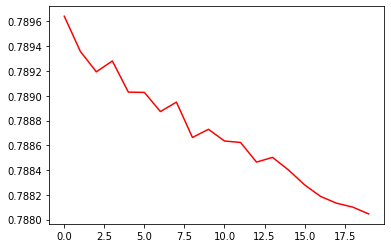

In [10]:
plt.plot(loss_list,color = 'r')
plt.savefig(model_path+"loss.png")

In [11]:
alphanet = alphanet.cpu()
pred_list = []
label_list = []
for _, (data, label) in enumerate(test_loader):
    data = Variable(data).float()
    pred = alphanet(data)
    pred_list.extend(pred.tolist())
    label_list.extend(label.tolist())

In [12]:
final = pd.DataFrame(pred_list)
final = pd.concat([target_list.reset_index(),final],axis=1)
final.rename(columns={0:Alpha_Name,'ticker': 'symbol'},inplace=True)
# final.set_index(["timestamp","symbol"],inplace=True)
final

,timestamp,symbol,target,AlphaNet_Original_Input_10d_return
0,2021-01-04 09:30:00,1,2.080068,0.045161
1,2021-01-05 09:30:00,1,2.542624,0.051653
2,2021-01-06 09:30:00,1,2.731188,0.033233
3,2021-01-07 09:30:00,1,1.487784,-0.048123
4,2021-01-08 09:30:00,1,0.894896,-0.064707
...,...,...,...,...
402675,2021-05-25 09:30:00,688981,-0.262939,-0.269232
402676,2021-05-26 09:30:00,688981,-0.222002,-0.203154
402677,2021-05-27 09:30:00,688981,-0.212631,-0.614140
402678,2021-05-28 09:30:00,688981,-0.232948,-0.408152


In [14]:
final.to_parquet(output_path
                + test_timestamp[0].split("_")[0] + "_" + test_timestamp[-1].split("_")[-1])